# Introduction to RDKit in Jupyter Notebook
## Introduction to RDKit

RDKit (Rational-Design Toolkit) is a widely-used open-source cheminformatics software package that provides a comprehensive set of tools for molecular modeling, chemical informatics, and drug discovery. Developed and maintained by an active community of researchers and developers, RDKit has become an indispensable resource in the field of computational chemistry and drug design.

### What is RDKit?

RDKit is a collection of algorithms and data structures for the representation, manipulation, and analysis of chemical structures and reactions. It is written in C++ with Python bindings, allowing seamless integration with the Python programming language, which is widely used in the scientific community.

RDKit supports a variety of cheminformatics tasks, including:

1. **Molecular Representation**: RDKit provides efficient data structures and algorithms for representing and manipulating chemical compounds, including the handling of 2D and 3D molecular structures, atom and bond properties, and more.

2. **Molecule Parsing and I/O**: RDKit can read and write a variety of chemical file formats, such as SMILES, SDF, and more, enabling easy integration with other cheminformatics tools and databases.

3. **Molecular Descriptors and Fingerprints**: RDKit offers a rich set of molecular descriptors and fingerprints, which are useful for tasks like similarity searching, virtual screening, and machine learning.

4. **Reaction Handling**: RDKit can represent and manipulate chemical reactions, including the ability to perform retrosynthetic analysis and reaction prediction.

5. **Visualization**: RDKit provides functionality for visualizing molecular structures, reactions, and other cheminformatics data using both 2D and 3D rendering.

6. **Machine Learning**: RDKit integrates with popular machine learning libraries, such as scikit-learn and TensorFlow, enabling the development of predictive models for various tasks, including activity prediction, property estimation, and more.

### Why use RDKit?

RDKit is a powerful and versatile cheminformatics tool that offers several key advantages:

1. **Open-Source and Cross-Platform**: RDKit is an open-source project, which means it is freely available and can be customized and extended by the community. It is also cross-platform, supporting Windows, macOS, and Linux.

2. **Comprehensive Functionality**: RDKit provides a wide range of features and functionality for various cheminformatics tasks, making it a one-stop-shop for many researchers and developers working in this field.

3. **Performance and Scalability**: RDKit is designed with performance and scalability in mind, allowing it to handle large chemical databases and complex computations efficiently.

4. **Integration with Python Ecosystem**: RDKit's Python bindings seamlessly integrate with the broader Python ecosystem, allowing easy interoperability with other popular scientific computing libraries, such as NumPy, Pandas, and scikit-learn.

5. **Active Community and Documentation**: RDKit has a vibrant community of users and contributors, providing extensive documentation, tutorials, and support resources to help users get started and stay up-to-date with the latest developments

# RDKit Fundamentals: A Comprehensive Guide

This notebook provides a detailed exploration of RDKit, a powerful cheminformatics library in Python for working with molecular structures, chemical informatics, and computational chemistry.

## Table of Contents
1. [Installation and Importing](#installation-and-importing)
2. [Creating Molecules](#creating-molecules)
3. [Molecule Properties](#molecule-properties)
4. [Molecular Manipulation](#molecular-manipulation)
5. [Structural Analysis](#structural-analysis)
6. [Molecular Descriptors](#molecular-descriptors)
7. [Chemical Reactions](#chemical-reactions)
8. [Substructure Searching](#substructure-searching)
9. [Molecular Visualization](#molecular-visualization)
10. [Advanced Techniques](#advanced-techniques)



## 1. Installation and Importing

To ensure that all dependencies are installed and to avoid conflicts with other projects, it's recommended to create a virtual environment. Follow the steps below to create and activate a virtual environment, and install the required packages:

1. Create a virtual environment:
    ```bash
    python3 -m venv myvenv
    ```

2. Activate the virtual environment:
    ```bash
    source myvenv/bin/activate
    ```

3. Install the required packages from `requirements.txt`:
    ```bash
    pip install -r requirements.txt
    ```

4. Install the `ipykernel` package:
    ```bash
    pip install ipykernel
    ```

5. Add the virtual environment to Jupyter:
    ```bash
    python -m ipykernel install --user --name=myvenv --display-name "myvenv"
    ```

Now you can select the `myvenv` kernel in Jupyter Notebook to ensure you are using the virtual environment.





To work with RDKit in this notebook, we need to import several libraries. These libraries will help us with tasks such as chemistry operations, drawing molecular structures, and displaying molecules in a grid. Below are the necessary imports:



In [2]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage
from rdkit.Chem import AllChem, Descriptors, Draw
import numpy as np

# Configure RDKit visualization
IPythonConsole.ipython_useSVG = True
IPythonConsole.molSize = (300, 300)
rdDepictor.SetPreferCoordGen(True)

## Understanding SMILES
SMILES (**S**implified **M**olecular **I**nput **L**ine **E**ntry **S**ystem) is a text-based notation for representing chemical structures. 
Developed in the 1980s, SMILES is compact, human-readable, and widely used for representing molecular structures programmatically.

## 2. Creating Molecules
### 2.1 Creating Molecules from SMILES

In [ ]:
# Create molecules from SMILES strings
ethanol = Chem.MolFromSmiles('CCO')
benzene = Chem.MolFromSmiles('c1ccccc1')
aspirin = Chem.MolFromSmiles('CC(=O)OC1=CC=CC=C1C(=O)O')

# Verify molecule creation
print("Ethanol SMILES:", Chem.MolToSmiles(ethanol))
print("Benzene SMILES:", Chem.MolToSmiles(benzene))
print("Aspirin SMILES:", Chem.MolToSmiles(aspirin))

Ethanol SMILES: CCO
Benzene SMILES: c1ccccc1
Aspirin SMILES: CC(=O)Oc1ccccc1C(=O)O


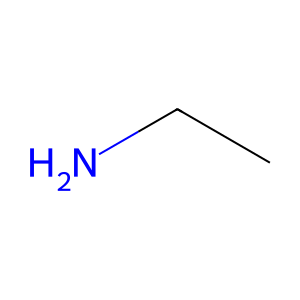

In [8]:
# Visualizing a molecule
molecule = Chem.MolFromSmiles("CCN")  # Ethylamine
molecule

### 2.2 Creating 3D Molecules

In [6]:
# Generate 3D coordinates for a molecule
mol = Chem.MolFromSmiles('CCO')
mol_3d = Chem.AddHs(mol)  # Add hydrogen atoms
AllChem.EmbedMolecule(mol_3d)  # Generate 3D coordinates
AllChem.MMFFOptimizeMolecule(mol_3d)  # Energy minimization

0

## 3. Molecule Properties

In [9]:
# Basic molecule properties
mol = Chem.MolFromSmiles('CCO')

# Molecular weight
mol_weight = Descriptors.ExactMolWt(mol)

# Atom count
atom_count = mol.GetNumAtoms()

# Bond count
bond_count = mol.GetNumBonds()

# Formal charge
formal_charge = Chem.GetFormalCharge(mol)

print(f"Molecular Weight: {mol_weight:.2f}")
print(f"Atom Count: {atom_count}")
print(f"Bond Count: {bond_count}")
print(f"Formal Charge: {formal_charge}")

Molecular Weight: 46.04
Atom Count: 3
Bond Count: 2
Formal Charge: 0


## 4. Molecular Manipulation
### 4.1 Adding and Removing Atoms/Hydrogens

In [10]:
# Add hydrogens
mol_with_h = Chem.AddHs(mol)

# Remove hydrogens
mol_without_h = Chem.RemoveHs(mol_with_h)

### 4.2 Modifying Molecules

In [11]:
# Clone a molecule
mol_copy = Chem.MolFromSmiles(Chem.MolToSmiles(mol))

# Sanitize molecule (correct valence, aromaticity)
Chem.SanitizeMol(mol)

rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE

## 5. Structural Analysis

In [12]:
# Ring information
mol = Chem.MolFromSmiles('c1ccccc1')
ring_info = mol.GetRingInfo()

# Check if molecule contains rings
has_rings = ring_info.NumRings() > 0

# Aromatic atom detection
aromatic_atoms = [atom.GetIdx() for atom in mol.GetAtoms() if atom.GetIsAromatic()]

print(f"Number of Rings: {ring_info.NumRings()}")
print(f"Aromatic Atoms: {aromatic_atoms}")

Number of Rings: 1
Aromatic Atoms: [0, 1, 2, 3, 4, 5]


## 6. Molecular Descriptors

In [13]:
mol = Chem.MolFromSmiles('CCO')

# Calculate various molecular descriptors
descriptors = {
    'Molecular Weight': Descriptors.ExactMolWt(mol),
    'LogP': Descriptors.MolLogP(mol),
    'Num H-Bond Donors': Descriptors.NumHDonors(mol),
    'Num H-Bond Acceptors': Descriptors.NumHAcceptors(mol),
    'Topological Polar Surface Area': Descriptors.TPSA(mol)
}

for name, value in descriptors.items():
    print(f"{name}: {value}")

Molecular Weight: 46.041864812
LogP: -0.0014000000000000123
Num H-Bond Donors: 1
Num H-Bond Acceptors: 1
Topological Polar Surface Area: 20.23


## 7. Chemical Reactions

Reaction Products: ['CC(=O)Cl']


[20:17:37] mapped atoms in the reactants were not mapped in the products.
  unmapped numbers are: 2 


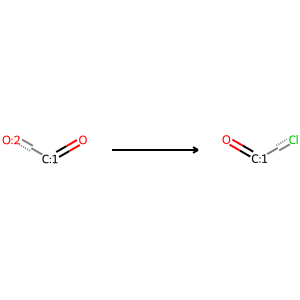

In [19]:
# Define a reaction SMARTS
reaction_smarts = '[C:1](=O)[OH:2]>>[C:1](=O)Cl'

# Create a reaction object
rxn = AllChem.ReactionFromSmarts(reaction_smarts)

# Apply reaction to a molecule (convert carboxylic acid to acid chloride)
reactant = Chem.MolFromSmiles('CC(=O)O')
products = rxn.RunReactants((reactant,))

# Convert products to SMILES
product_smiles = [Chem.MolToSmiles(prod[0]) for prod in products]
print("Reaction Products:", product_smiles)

rxn

## 8. Substructure Searching

In [20]:
# Create a molecule and a substructure
mol = Chem.MolFromSmiles('c1ccccc1CO')
substructure = Chem.MolFromSmarts('c1ccccc1')

# Check for substructure match
has_substructure = mol.HasSubstructMatch(substructure)
print("Has Substructure:", has_substructure)

# Get substructure matches
matches = mol.GetSubstructMatches(substructure)
print("Substructure Matches:", matches)

Has Substructure: True
Substructure Matches: ((0, 1, 2, 3, 4, 5),)


## 9. Molecular Visualization

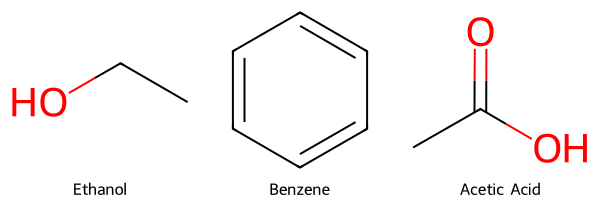

In [22]:
# Generate 2D depiction of molecules
molecules = [
    Chem.MolFromSmiles('CCO'),
    Chem.MolFromSmiles('c1ccccc1'),
    Chem.MolFromSmiles('CC(=O)O')
]

# Create a grid image of molecules
img = Draw.MolsToGridImage(molecules, molsPerRow=3, legends=['Ethanol', 'Benzene', 'Acetic Acid'])
img

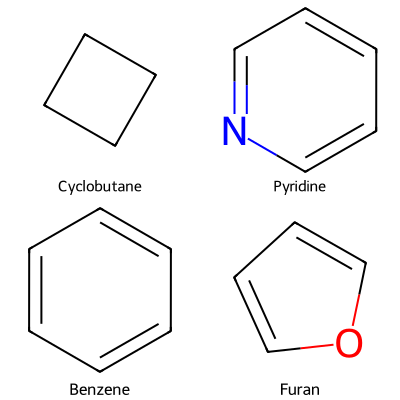

In [25]:
def display_structures(smiles_list):
    mol_list = []
    name_list = []
    for smiles, name in smiles_list:
        mol_list.append(Chem.MolFromSmiles(smiles))
        name_list.append(name)
    return MolsToGridImage(mol_list, legends=name_list, molsPerRow=2)

# Example exercise SMILES
exercise_smiles = [
    ("C1CCC1", "Cyclobutane"),
    ("c1ccncc1", "Pyridine"),
    ("c1ccccc1", "Benzene"),
    ("c1ccoc1", "Furan"),
]

display_structures(exercise_smiles)

## 10. Advanced Techniques
### 10.1 Fingerprint Generation

In [23]:
from rdkit.Chem import AllChem
from rdkit import DataStructs

# Generate Morgan Fingerprints (Extended Connectivity Fingerprints)
mol1 = Chem.MolFromSmiles('CCO')
mol2 = Chem.MolFromSmiles('CCO')
mol3 = Chem.MolFromSmiles('c1ccccc1')

# Generate fingerprints
fp1 = AllChem.GetMorganFingerprintAsBitVect(mol1, 2)
fp2 = AllChem.GetMorganFingerprintAsBitVect(mol2, 2)
fp3 = AllChem.GetMorganFingerprintAsBitVect(mol3, 2)

# Calculate similarity
similarity_1_2 = DataStructs.TanimotoSimilarity(fp1, fp2)
similarity_1_3 = DataStructs.TanimotoSimilarity(fp1, fp3)

print(f"Similarity between mol1 and mol2: {similarity_1_2}")
print(f"Similarity between mol1 and mol3: {similarity_1_3}")

Similarity between mol1 and mol2: 1.0
Similarity between mol1 and mol3: 0.0


### 10.2 Conformer Generation

In [24]:
# Generate multiple conformers
mol = Chem.MolFromSmiles('CCO')
mol = Chem.AddHs(mol)

# Generate multiple conformers
conformers = AllChem.EmbedMultipleConfs(mol, numConfs=10)

# Energy minimize conformers
for conf in conformers:
    AllChem.MMFFOptimizeMolecule(mol, confId=conf)

In [26]:
buff = """C(=N)(N)N.Cl
Cn1c(=O)c2[nH]cnc2n(C)c1=O.Cn1c(=O)c2[nH]cnc2n(C)c1=O.NCCN
Nc1ccc(S(=O)(=O)Nc2ccccn2)cc1
Cl.N=C(N)N
CCC(C)C1(C(=O)NC(=O)[N-]C1=O)CC.[Na+]
"""

smiles_list = buff.split("\n")
unique_smiles = set([Chem.MolToSmiles(Chem.MolFromSmiles(sm)) for sm in smiles_list if sm.strip()])
print(f"Number of unique molecules: {len(unique_smiles)}")

Number of unique molecules: 4



## Conclusion
This notebook provides a comprehensive overview of RDKit's fundamental capabilities. RDKit is an incredibly powerful library for computational chemistry, offering tools for molecular representation, manipulation, analysis, and visualization.

## Recommended Resources
- [RDKit Documentation](https://www.rdkit.org/docs/index.html)
- [RDKit GitHub Repository](https://github.com/rdkit/rdkit)
- [RDKit Tutorials](https://www.rdkit.org/docs/Tutorial.html)

## Additional Notes
- Always install RDKit in a conda environment for the best compatibility
- Keep RDKit and its dependencies updated
- Explore the extensive documentation for more advanced features